In [1]:
# Backward Euler Method
using LinearAlgebra
function backeuler(a, b, u0, N)
    u=zeros(N+1)
    dt=(b-a)/N
    t=Vector(range(a, b, N+1))
    A=1 .- t.^2 *dt # A is Generated by Backward Euler method for du/dt=t^2 *u
    u[1]=u0
    for i in 1:N
        u[i+1]=u[i]/A[i]
    end
    return t, u
end

backeuler (generic function with 1 method)

In [2]:
# Parareal method
function parareal(a, b, u0, N, F, G, K)
    # a= start time value (t0)
    # b= End time value (tend)
    # N= Number of Subinterval
    # u0=initial Solution
    # F= Fine Solver
    # G= Coarse Solver
    # K= Parareal iteration
    
    tval=Vector(range(a, b, N+1))
    # Storing Fine Solution on each time step for comparison
    Ufine=zeros(N+1)
    Ufine[1]=u0
    for i in 1:N
        Ufine[i+1]=F(tval[i], tval[i+1], Ufine[i])
    end
    # Initializing Uk
    Uk=[zeros(N+1) for k in 1:K+1]
    #Storing the initial solution
    for k in 1:K+1
        Uk[k][1]=u0
    end
    # Parareal Initialization
    for j in 1:N
        Uk[1][j+1]=G(tval[j], tval[j+1], Uk[1][j])
    end
    # Parareal loop
    for k in 1:K
        for i in 1:N
            Fk0=F(tval[i], tval[i+1], Uk[k][i])
            Gk0=G(tval[i], tval[i+1], Uk[k][i])
            Gk1=G(tval[i], tval[i+1], Uk[k+1][i])
            
            Uk[k+1][i+1]=Fk0 + Gk1 - Gk0
        end
    end
    
    return Uk, Ufine, tval
  
end

parareal (generic function with 1 method)

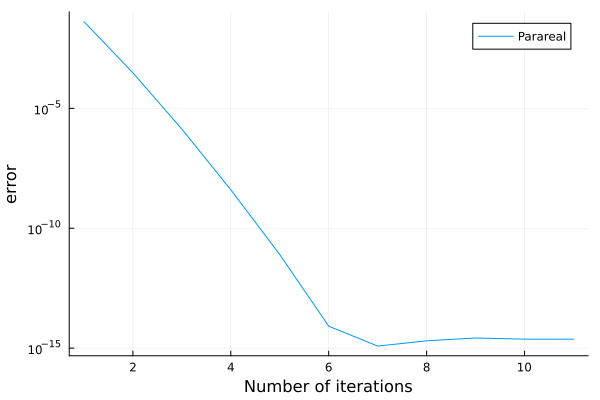

In [3]:
a=0
b=1
u0=1

#exact=exp.((t.^3)/3)


nF=100 # Fine grid
nG=2 # Coarse grid
K=10 # Number of iteration

function finesol(a, b, u0)
    t, u=backeuler(a, b, u0, nF)
    return u[end]
end
function coarsesol(a, b, u0)
    t, u=backeuler(a, b, u0, nG)
    return u[end]
end

N=10 # Number of Subintervals

# Parareal Solution
Uk, Ufine, tval=parareal(a, b, u0, N, finesol, coarsesol, K)

# stroing errors
    err=zeros(K+1)
    for k in 1:K+1
        err[k]=norm(Uk[k]-Ufine)
    end
using Plots
plot(err, yaxis=:log, xlabel="Number of iterations", ylabel="error", label="Parareal")

In [5]:
A=Matrix[1 0; 1 2]

LoadError: MethodError: [0mCannot `convert` an object of type 
[0m  [92mInt64[39m[0m to an object of type 
[0m  [91mMatrix[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::LinearAlgebra.Factorization[39m) where T<:AbstractArray at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/LinearAlgebra/src/factorization.jl:58
[0m  convert(::Type{T}, [91m::AbstractArray[39m) where T<:Array at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/array.jl:554
[0m  convert(::Type{T}, [91m::T[39m) where T<:AbstractArray at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/abstractarray.jl:16
[0m  ...